# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


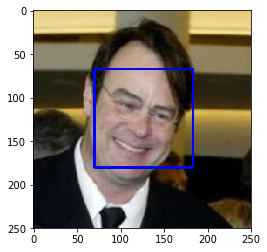

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm
from functools import reduce

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

In [7]:
def percent_human(files, detector):
    detected = list(map(detector, files))
    return sum(map(lambda x: 1 if x else 0, detected)) / len(detected)

print("percent of humans detected to be humans: {}".format(percent_human(human_files_short, face_detector)))
print("percent of dogs detected to be humans: {}".format(percent_human(dog_files_short, face_detector)))

percent of humans detected to be humans: 0.98
percent of dogs detected to be humans: 0.17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
import time
from os import listdir

cascades = { cascade:file for [cascade, file] in map(lambda x : [x[24:-4], 'haarcascades/' + x], listdir('haarcascades')) }

def detect_object_cascade(cascade_file, img_path):
    cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    objects = cascade.detectMultiScale(gray)
    return len(objects) > 0

def percent_detected(img_files, detector):
    detected = list(map(detector, img_files))
    return sum(map(lambda x: 1 if x else 0, detected)) / len(detected)

def rate_detector(detection_method, detector):
    start = time.time()
    print("rating detection method {}".format(detection_method))
    print("percent of human images detected: {}".format(percent_detected(human_files_short, detector)))
    print("percent of dogs images detected: {}".format(percent_detected(dog_files_short, detector)))
    print("took {} seconds".format(time.time() - start))
    print("=========")

def cascade_detector(cascade_file):
    return lambda x : detect_object_cascade(cascade_file, x)

In [6]:
for cascade_name, cascade_file in cascades.items():
    rate_detector(cascade_name, cascade_detector(cascade_file))

rating detection method alt2
percent of human images detected: 0.98
percent of dogs images detected: 0.17
took 92.338787317276 seconds
rating detection method alt_tree
percent of human images detected: 0.98
percent of dogs images detected: 0.17
took 90.6826696395874 seconds
rating detection method default
percent of human images detected: 0.98
percent of dogs images detected: 0.17
took 90.64785432815552 seconds
rating detection method alt
percent of human images detected: 0.98
percent of dogs images detected: 0.17
took 90.48003697395325 seconds


## Conclusion

None of them were any better than any other in detection and the difference in time it took to run was negligble and could have been due to any number of factors

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

print(VGG16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 98896081.71it/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def classify(model, img_path):
    if use_cuda:
        model = model.cuda()
    
    for param in model.parameters():
        param.requires_grad_(False)
    
    model.eval()
    original_image = Image.open(img_path).convert('RGB')
    
    in_transform = transforms.Compose([
                    transforms.Resize((224, 224)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), 
                                         (0.229, 0.224, 0.225))])
    
    image = in_transform(original_image)[:3,:,:].unsqueeze(0)
    image.unsqueeze(0)
    if use_cuda:
        image = image.cuda()
    
    output = model(image)
    index = torch.max(output, 1)[1][0].item()
    
    return index
    
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    return classify(VGG16, img_path)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    return 151 <= VGG16_predict(img_path) <= 268

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
rate_detector('VGG16 based dog detection', dog_detector)

rating detection method VGG16 based dog detection
percent of human images detected: 0.0
percent of dogs images detected: 1.0
took 8.139695405960083 seconds


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
import torch
import torchvision.models as models

use_cuda = torch.cuda.is_available()

some_models = {
    'resnet18' : models.resnet18(pretrained=True),
    'alexnet' : models.alexnet(pretrained=True),
    'squeezenet' : models.squeezenet1_0(pretrained=True),
    'vgg16' : models.vgg16(pretrained=True),
    'densenet' : models.densenet161(pretrained=True),
    'inception' : models.inception_v3(pretrained=True),
#Apparently some environments are missing a number of models AttributeError: module 'torchvision.models' has no attribute 'googlenet'
#    'googlenet' : models.googlenet(pretrained=True),
#    'shufflenet' : models. shufflenet_v2_x1_0(pretrained=True),
#    'mobilenet' : models.mobilenet_v2(pretrained=True),
#    'resnext50_32x4d' : models.resnext50_32x4d(pretrained=True),
#    'wide_resnet50_2' : models.wide_resnet50_2(pretrained=True),
#    'mnasnet' : models.mnasnet1_0(pretrained=True)
}

def generate_dog_detector(model):
    return lambda x: 151 <= classify(model, x) <= 268


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 74069423.92it/s]
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.torch/models/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:03<00:00, 81037605.64it/s]
/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.torch/models/squeezenet1_0-a815701f.pth
100%|██████████| 5017600/5017600 [00:00<00:00, 13319144.04it/s]
/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1

In [11]:
for model_name, model in some_models.items():
    rate_detector("{} based dog detection".format(model_name), generate_dog_detector(model))

rating detection method resnet18 based dog detection
percent of human images detected: 0.01
percent of dogs images detected: 1.0
took 3.8545022010803223 seconds
rating detection method alexnet based dog detection
percent of human images detected: 0.01
percent of dogs images detected: 0.99
took 2.891031265258789 seconds
rating detection method squeezenet based dog detection
percent of human images detected: 0.03
percent of dogs images detected: 1.0
took 3.1622188091278076 seconds
rating detection method vgg16 based dog detection
percent of human images detected: 0.0
percent of dogs images detected: 1.0
took 7.586473226547241 seconds
rating detection method densenet based dog detection
percent of human images detected: 0.0
percent of dogs images detected: 1.0
took 14.627135992050171 seconds
rating detection method inception based dog detection


RuntimeError: Given input size: (2048x5x5). Calculated output size: (2048x0x0). Output size is too small at /opt/conda/conda-bld/pytorch_1524584710464/work/aten/src/THCUNN/generic/SpatialAveragePooling.cu:63

## Conclusion
vgg16 and densenet had the same accuracy, but vgg16 was approximately twice as fast. Looks like inception wants a larger base image according to torchvision [docs](https://pytorch.org/docs/master/torchvision/models.html#inception-v3).

> Important: In contrast to the other models the inception_v3 expects tensors with a size of N x 3 x 299 x 299, so ensure your images are sized accordingly.

I don't think it's worth further investigation at this time. vgg16 seems reasonable.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [9]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

base_dir = '/data/dog_images'

train_transform = transforms.Compose([transforms.Resize(300),
                                      transforms.RandomResizedCrop(256),
                                      transforms.RandomRotation(30),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])

test_transform = transforms.Compose([transforms.Resize(300),
                                     transforms.CenterCrop(256),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])

train_data = datasets.ImageFolder(base_dir + '/train', transform=train_transform)
valiadation_data = datasets.ImageFolder(base_dir + '/valid', transform=test_transform)
test_data = datasets.ImageFolder(base_dir + '/test', transform=test_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
validation_loader = torch.utils.data.DataLoader(valiadation_data, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True)

loaders_scratch = {
    'train': train_loader,
    'valid': validation_loader,
    'test': test_loader
}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I decided to pick a larger image size of 512 x 512, because it looks like we don't have that many files, and so I'm favoring larger images over training speed in hopes of getting richer training. Also, powers of 2 should allow for a good number of transforms. This did not work out as I kept running out of memory. I'm resizing then center cropping for test data. Resizing first should mean that our crop is a significant portion of the image regardless of original size. Center cropping should allow us to throw away some background noise.

For training, I decided to use RandomResizeCrop because it feels like that should do mostly the same thing but expand the dataset through some randomness. I decided to augment the dataset for training in order to extend the training material at least in part because it looks like we don't have that many files. I chose rotation of up to 30 degrees as I expect most images to be relatively vertical, but to have dog heads cocked occasionally. I chose to have horizontal flips since dogs are mostly symmetric, and it should thus effectively double the input data.

I went back and forth on this stuff a bit more as I expanded my research, but ended up mostly back where I started from.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        conv_depths = [[3, 16], [16, 32], [32, 64], [64, 128], [128, 256]]

        self.conv_layers = nn.ModuleList(
            [nn.Conv2d(in_layers, out_layers, 3, padding = 1) for in_layers, out_layers in conv_depths])
        self.batch_norm_layers = nn.ModuleList(
            [nn.BatchNorm2d(out_layers) for in_layers, out_layers in conv_depths])
        self.pool = nn.MaxPool2d(2,2)
        input_xy = 256
        num_pools = len(conv_depths)
        xy_redux = 2**num_pools
        output_xy = int(input_xy / xy_redux)
        conv_depth = conv_depths[-1][1]
        self.global_avg_pool = nn.AvgPool2d(output_xy)
        # without the global average pooling layer the next line is true
        # self.linear_input = conv_depth * output_xy * output_xy
        self.linear_input = conv_depth
        linear_dims = [[self.linear_input, 4096],
                      [4096, 2048],
                      [2048, 1024]]
        
        self.middle_linear_layers = nn.ModuleList(
            [nn.Linear(in_layers, out_layers) for in_layers, out_layers in linear_dims])
        
        self.last_layer = nn.Linear(linear_dims[-1][1], 133)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        for i, conv_layer in enumerate(self.conv_layers):
            x = self.batch_norm_layers[i](self.pool(F.relu(conv_layer(x))))
        x = self.global_avg_pool(x)
        x = x.view(-1, self.linear_input)
        self.dropout(x)
        for layer in self.middle_linear_layers:
            x = self.dropout(F.relu(layer(x)))
        return self.last_layer(x)
        

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

print(model_scratch)

Net(
  (conv_layers): ModuleList(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (batch_norm_layers): ModuleList(
    (0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

First, I wanted to be able to change the sizes and number of my layers without having to recalculate everything so I made it based on some configuration.

Next, I was inspired by the vgg16. It had a bit of a larger problem space than just dog breed classification but it seemed to do a pretty good job on dog breed classification. I decided to mimic the idea of multiple convolutional layers per max pooling layer and the 3 linear layers at the end. Since we have a much smaller data set, I figure we have a smaller risk of overfitting and so chose a smaller dropout.

I found a number of hardware limitations. Tried to make the convolutional layers too large and it took too long to just create the net. Then I ended up running out of RAM, and started scaling things back. I also seemed to get a truncated file issue so I followed https://github.com/keras-team/keras/issues/5475 .

My scaled back solution wasn't working. I went through various articles. I found a few implementations of a dog breed classifier in Keras. This one looked useful https://raw.githubusercontent.com/poojasriravichandran/Dog_App/master/dog_app.ipynb . I found it was using this global pooling layer. That lead me to a number of articles, https://keras.io/layers/pooling/ https://discuss.pytorch.org/t/global-average-pooling-in-pytorch/6721 https://alexisbcook.github.io/2017/global-average-pooling-layers-for-object-localization/ <-- by one of our instructors. But the global averaging didn't crack the problem.

A bunch more research and banging my head against the wall, I found https://medium.com/@uijaz59/dog-breed-classification-using-pytorch-207cf27c2031 . They were doing batch normalization. I read up on that https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c and added it to my network. BAM! Magic bullet to get from 1% accuracy to 47%.

Other things I tried: various batch sizes, various numbers and sizes of convolutional and dense layers, a couple different optimizers.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [11]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [12]:
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf #0.652
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        start = time.time()
        for batch_idx, (data, target) in enumerate(train_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += (loss.data - train_loss) / (batch_idx + 1)
            #print('did one')
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        correct = 0.0
        total = 0.0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(validation_loader):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                output = model(data)
                loss = criterion(output, target)
                valid_loss += (loss.data - valid_loss) / (batch_idx + 1)
                pred = output.data.max(1, keepdim=True)[1]
                # compare predictions to true label
                correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
                total += data.size(0)
            
        # print training/validation statistics 
        print('Epoch: {} Time: {} Training Loss: {:.3f} Validation Loss: {:.3f} Val accuracy {:.3f} Correct {:.0f} Total {:.0f}'.format(
            epoch,
            time.time() - start,
            train_loss,
            valid_loss,
            correct / total,
            correct,
            total
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
    # return trained model
    return model

In [56]:
# train the model
from workspace_utils import active_session
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

with active_session():
    model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                          criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 Time: 113.42174029350281 Training Loss: 3.234 Validation Loss: 2.701 Val accuracy 0.307 Correct 256 Total 835
Validation loss decreased (inf --> 2.700785).  Saving model ...
Epoch: 2 Time: 113.03319835662842 Training Loss: 3.208 Validation Loss: 2.571 Val accuracy 0.339 Correct 283 Total 835
Validation loss decreased (2.700785 --> 2.570942).  Saving model ...
Epoch: 3 Time: 113.07424807548523 Training Loss: 3.225 Validation Loss: 2.584 Val accuracy 0.323 Correct 270 Total 835
Epoch: 4 Time: 112.06094479560852 Training Loss: 3.136 Validation Loss: 2.638 Val accuracy 0.334 Correct 279 Total 835
Epoch: 5 Time: 111.72976636886597 Training Loss: 3.146 Validation Loss: 2.697 Val accuracy 0.322 Correct 269 Total 835
Epoch: 6 Time: 111.6922378540039 Training Loss: 3.087 Validation Loss: 2.540 Val accuracy 0.328 Correct 274 Total 835
Validation loss decreased (2.570942 --> 2.540286).  Saving model ...
Epoch: 7 Time: 113.59004402160645 Training Loss: 3.090 Validation Loss: 2.618 Val acc

Epoch: 62 Time: 110.80414581298828 Training Loss: 2.592 Validation Loss: 1.983 Val accuracy 0.479 Correct 400 Total 835
Epoch: 63 Time: 111.16559672355652 Training Loss: 2.593 Validation Loss: 1.923 Val accuracy 0.501 Correct 418 Total 835
Epoch: 64 Time: 111.13597512245178 Training Loss: 2.589 Validation Loss: 2.046 Val accuracy 0.492 Correct 411 Total 835
Epoch: 65 Time: 111.6567895412445 Training Loss: 2.588 Validation Loss: 2.004 Val accuracy 0.487 Correct 407 Total 835
Epoch: 66 Time: 112.04625129699707 Training Loss: 2.544 Validation Loss: 2.044 Val accuracy 0.469 Correct 392 Total 835
Epoch: 67 Time: 112.61690521240234 Training Loss: 2.547 Validation Loss: 2.550 Val accuracy 0.501 Correct 418 Total 835
Epoch: 68 Time: 112.11928129196167 Training Loss: 2.571 Validation Loss: 2.004 Val accuracy 0.491 Correct 410 Total 835
Epoch: 69 Time: 111.64204049110413 Training Loss: 2.521 Validation Loss: 1.924 Val accuracy 0.483 Correct 403 Total 835
Epoch: 70 Time: 111.55069732666016 Traini

In [13]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [14]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [17]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 1.914108


Test Accuracy: 53% (449/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [15]:
base_dir = '/data/dog_images'

train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomRotation(30),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
                                     ])

test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
                                     ])

train_data = datasets.ImageFolder(base_dir + '/train', transform=train_transform)
valiadation_data = datasets.ImageFolder(base_dir + '/valid', transform=test_transform)
test_data = datasets.ImageFolder(base_dir + '/test', transform=test_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
validation_loader = torch.utils.data.DataLoader(valiadation_data, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True)

loaders_transfer = {
    'train': train_loader,
    'valid': validation_loader,
    'test': test_loader
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [16]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg16(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.classifier[6] = nn.Linear(model_transfer.classifier[6].in_features, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

From what we found earlier it looks like the VGG16 did a pretty good job at classifying dog breeds already. So, I began by following what we did in the transfer learning solution for flowers, but decided I only need to retrain and replace the last layer. Bascially, it's already good at detecting dog breeds, but the values that it outputs have changed so it shouldn't need a lot of manipulation.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [17]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier[6].
        parameters(), lr = 0.0001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [36]:
# train the model
# train the model
from workspace_utils import active_session
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

with active_session():
    model_transfer = train(100, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


KeyboardInterrupt: 

In [18]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [38]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.605507


Test Accuracy: 83% (700/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [19]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    return class_names[classify(model_transfer, img_path)]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [20]:
### Feel free to use as many code cells as needed.
from enum import Enum

class Detected_Entity(Enum):
    BAMBOOZLE = 0
    HOOMAN = 1
    DOGGO = 2

def detect_entity(img_path):
    if dog_detector(img_path):
        return Detected_Entity.DOGGO
    elif face_detector(img_path):
        return Detected_Entity.HOOMAN
    else:
        return Detected_Entity.BAMBOOZLE

greetings = {
    Detected_Entity.BAMBOOZLE: 'Hello fren,',
    Detected_Entity.DOGGO: 'Hello doggo fren,',
    Detected_Entity.HOOMAN: 'Hello hooman fren,'
}

intro = {
    Detected_Entity.BAMBOOZLE: 'this do me a heckin bamboozle, is it a snek?',
    Detected_Entity.DOGGO: 'I think you is a ...',
    Detected_Entity.HOOMAN: 'I think you look like a ...'
}

def show_image(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

def run_app(img_path):
    entity = detect_entity(img_path)
    print(greetings[entity])
    show_image(img_path)
    print(intro[entity])
    if entity != Detected_Entity.BAMBOOZLE:
        print(predict_breed_transfer(img_path))
    print('')
    print('')
    print('')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__
I think it did about what I expected.

Points for improvement:
1. More training data
2. We could use batch normalization on the linear layers and a global pooling layer between the convolutional layers and the linear layers
3. VGG16 seemed pretty good already at detecting dog breeds and we lost some of that by retraining at all, we could just map the ImageNet breed indices to our indices instead of retraining it.
4. We could experiment with momentum.

Hello doggo fren,


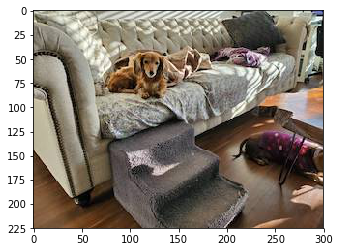

I think you is a ...
Dachshund



Hello doggo fren,


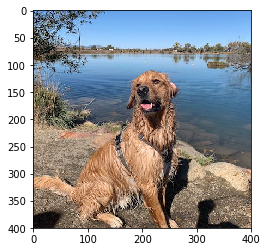

I think you is a ...
Golden retriever



Hello hooman fren,


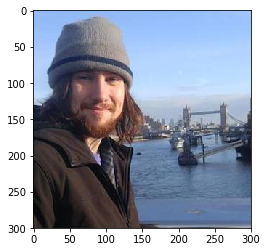

I think you look like a ...
Silky terrier



Hello doggo fren,


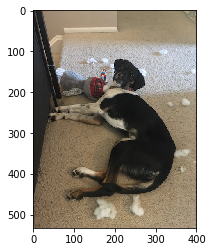

I think you is a ...
Greater swiss mountain dog



Hello hooman fren,


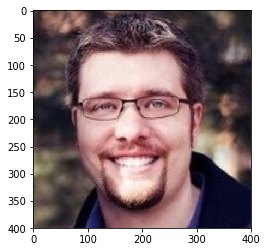

I think you look like a ...
Pharaoh hound



Hello doggo fren,


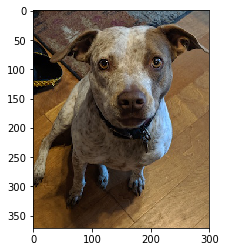

I think you is a ...
German shorthaired pointer



Hello fren,


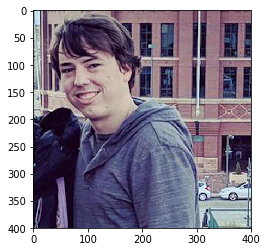

this do me a heckin bamboozle, is it a snek?



Hello fren,


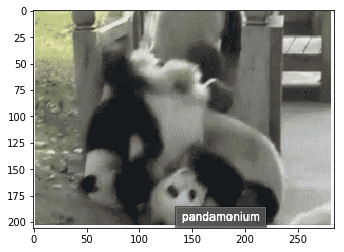

this do me a heckin bamboozle, is it a snek?



Hello hooman fren,


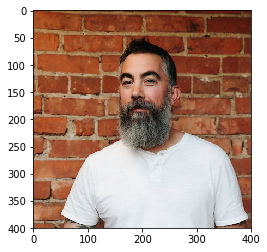

I think you look like a ...
Wirehaired pointing griffon



Hello doggo fren,


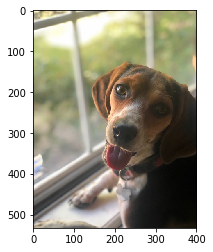

I think you is a ...
American foxhound



Hello doggo fren,


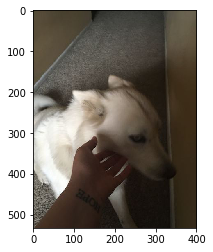

I think you is a ...
Italian greyhound



Hello doggo fren,


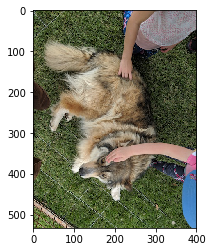

I think you is a ...
Cardigan welsh corgi



Hello fren,


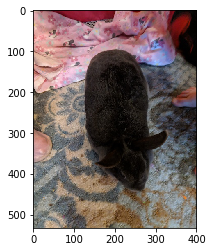

this do me a heckin bamboozle, is it a snek?



Hello doggo fren,


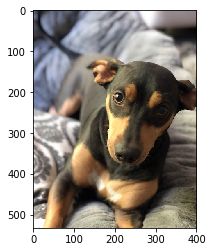

I think you is a ...
Manchester terrier



Hello fren,


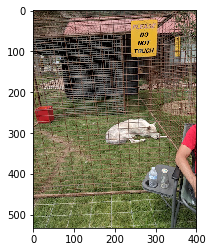

this do me a heckin bamboozle, is it a snek?



Hello doggo fren,


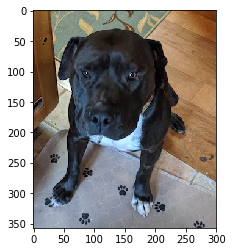

I think you is a ...
Cane corso



Hello hooman fren,


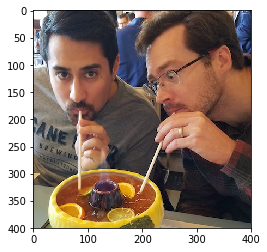

I think you look like a ...
Dogue de bordeaux



Hello doggo fren,


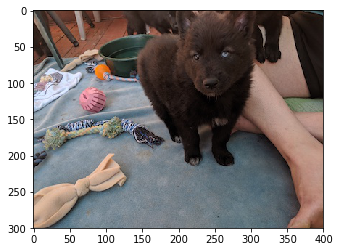

I think you is a ...
Belgian sheepdog



Hello fren,


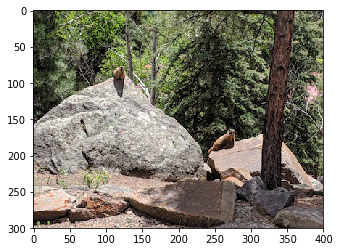

this do me a heckin bamboozle, is it a snek?



Hello doggo fren,


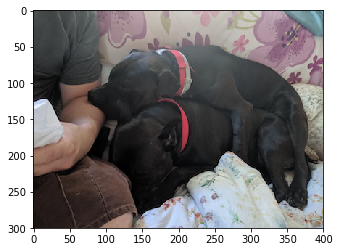

I think you is a ...
Neapolitan mastiff



Hello doggo fren,


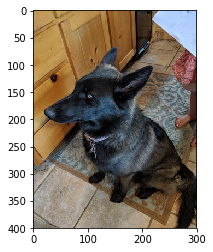

I think you is a ...
Norwegian elkhound



Hello hooman fren,


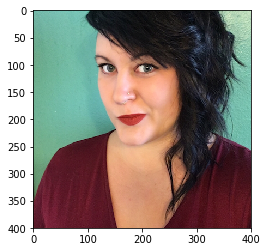

I think you look like a ...
Chinese crested



Hello doggo fren,


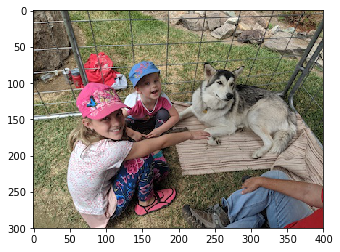

I think you is a ...
Alaskan malamute



Hello hooman fren,


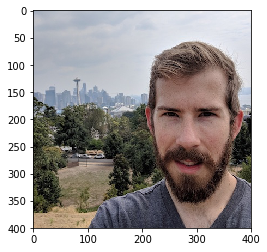

I think you look like a ...
Silky terrier



Hello hooman fren,


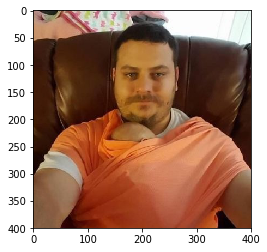

I think you look like a ...
Dachshund



Hello fren,


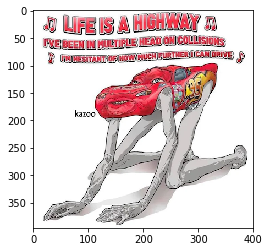

this do me a heckin bamboozle, is it a snek?



Hello fren,


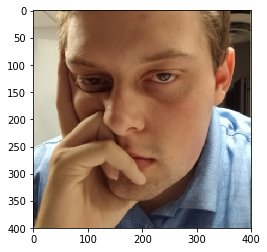

this do me a heckin bamboozle, is it a snek?



Hello hooman fren,


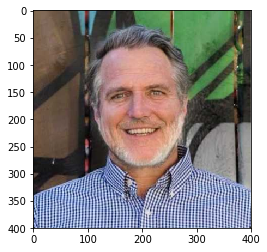

I think you look like a ...
Dogue de bordeaux



Hello hooman fren,


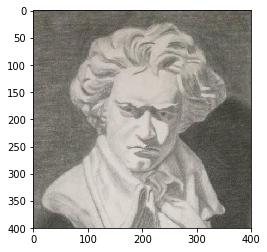

I think you look like a ...
Chinese crested



Hello doggo fren,


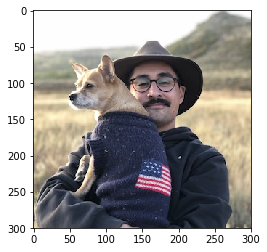

I think you is a ...
Chihuahua



Hello fren,


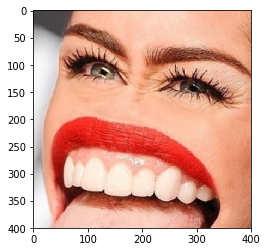

this do me a heckin bamboozle, is it a snek?



Hello fren,


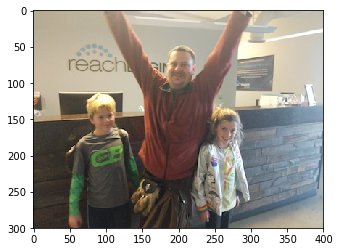

this do me a heckin bamboozle, is it a snek?



Hello fren,


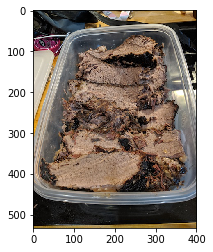

this do me a heckin bamboozle, is it a snek?



Hello fren,


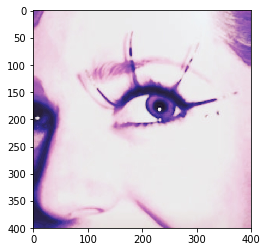

this do me a heckin bamboozle, is it a snek?



Hello doggo fren,


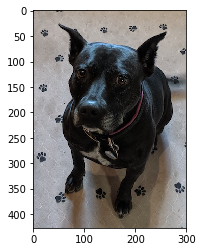

I think you is a ...
French bulldog



Hello hooman fren,


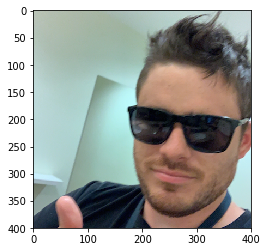

I think you look like a ...
Silky terrier



Hello doggo fren,


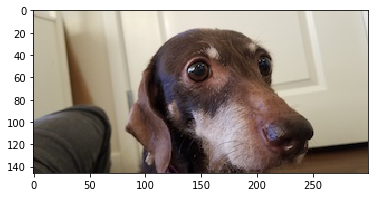

I think you is a ...
Dachshund





In [21]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
from os import listdir
from os.path import isfile, join

folder = 'images/random'
for file in [f for f in listdir(folder) if isfile(join(folder, f))]:
    run_app(folder + '/' + file)

#for file in np.hstack((human_files[:3], dog_files[:3])):
#    run_app(file)